#K-Means


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


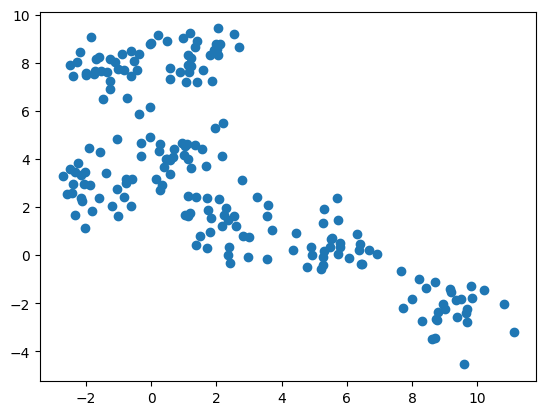

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers = 7, n_samples=200, random_state=0, cluster_std =0.8)
#X
#y
plt.scatter(X[:,0], X[:,1])

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(7)
model.fit(X)
print(model.cluster_centers_)

[[ 2.26189208  1.33157992]
 [ 9.13331504 -2.17358764]
 [ 1.3252277   8.34630565]
 [-1.76037788  2.81914737]
 [-1.33660885  7.72210196]
 [ 5.62806698  0.39282033]
 [ 0.69785272  4.23542316]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


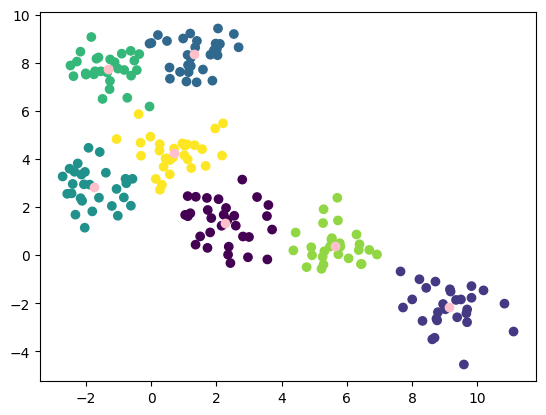

In [ ]:

plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color="pink")

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy dcore is", acc)

Accuracy dcore is 0.14


In [ ]:
y

array([0, 4, 5, 4, 2, 4, 2, 1, 0, 2, 0, 3, 0, 3, 5, 3, 5, 2, 1, 5, 1, 1,
       6, 3, 2, 0, 6, 6, 0, 6, 1, 5, 3, 3, 6, 6, 0, 0, 4, 1, 2, 1, 1, 3,
       5, 1, 1, 3, 0, 4, 0, 0, 2, 6, 5, 6, 4, 5, 4, 5, 2, 1, 5, 1, 4, 4,
       3, 3, 1, 0, 4, 6, 0, 2, 2, 6, 2, 6, 2, 5, 1, 0, 6, 5, 4, 6, 1, 4,
       4, 6, 1, 2, 2, 5, 5, 0, 0, 3, 4, 4, 6, 4, 5, 1, 0, 6, 2, 4, 6, 0,
       3, 0, 3, 6, 1, 2, 6, 5, 6, 3, 5, 1, 2, 1, 1, 6, 1, 3, 2, 0, 3, 1,
       5, 3, 0, 0, 3, 3, 0, 5, 2, 4, 2, 0, 4, 5, 6, 6, 1, 4, 2, 3, 5, 2,
       2, 4, 2, 0, 6, 2, 4, 6, 5, 6, 6, 0, 4, 2, 1, 6, 5, 5, 3, 5, 2, 3,
       4, 4, 2, 1, 3, 3, 3, 2, 1, 4, 4, 5, 5, 1, 1, 3, 0, 3, 3, 0, 3, 0,
       4, 5])

In [ ]:
from scipy import stats

def find_permutation(n_clusters, real_labels, labels):
  real_labels = np.asarray(real_labels)
  labels = np.asarray(labels)
  permutation = []
  for i in range(n_clusters):
    idx = labels == i
    if np.sum(idx) == 0:
     print(f"Cluster {i} has no members.")
     continue
    mode_result = stats.mode(real_labels[idx])
    print(f"Cluster {i}: mode_result = {mode_result}, mode_result.mode = {mode_result.mode}")
    new_label = mode_result.mode.item()
    permutation.append(new_label)
  return permutation

permutation = find_permutation(7, y, model.labels_)
print(permutation)

Cluster 0: mode_result = ModeResult(mode=1, count=29), mode_result.mode = 1
Cluster 1: mode_result = ModeResult(mode=4, count=28), mode_result.mode = 4
Cluster 2: mode_result = ModeResult(mode=6, count=27), mode_result.mode = 6
Cluster 3: mode_result = ModeResult(mode=2, count=28), mode_result.mode = 2
Cluster 4: mode_result = ModeResult(mode=3, count=27), mode_result.mode = 3
Cluster 5: mode_result = ModeResult(mode=5, count=27), mode_result.mode = 5
Cluster 6: mode_result = ModeResult(mode=0, count=28), mode_result.mode = 0
[1, 4, 6, 2, 3, 5, 0]


In [ ]:
new_labels=[permutation[label] for label in model.labels_]
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.97


#DBSCAN

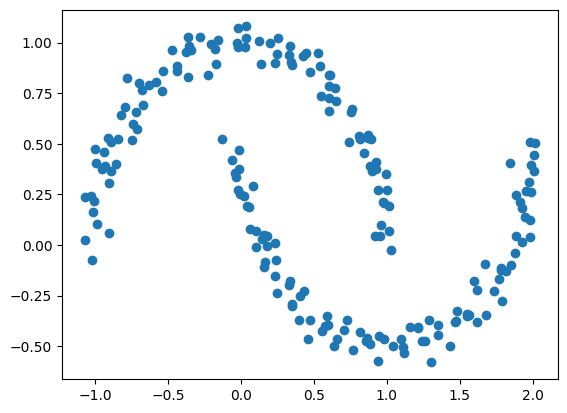

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state = 0)
plt.scatter(X[:,0], X[:,1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


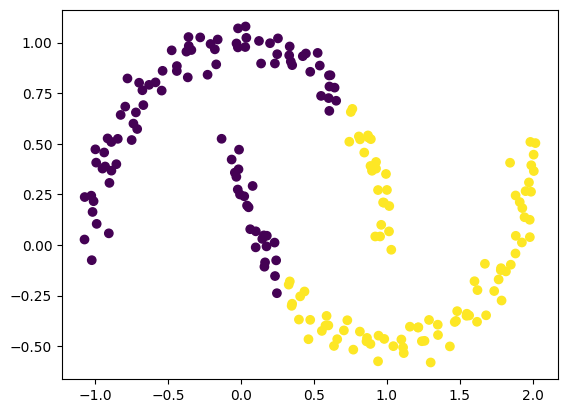

In [ ]:
model = KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_)

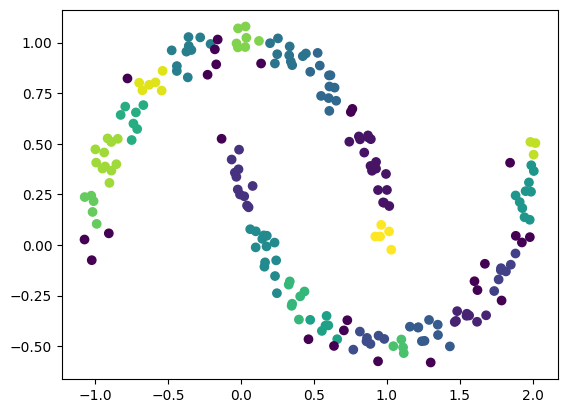

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.1)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_)

#Hierarchical

In [ ]:
import seaborn as sns; sns.set(color_codes = True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
species_colors = species.map({
    'setosa' : 'blue',
    'versicolor' : 'purple',
    'virginica' : 'white'
})
species_colors

0       blue
1       blue
2       blue
3       blue
4       blue
       ...  
145    white
146    white
147    white
148    white
149    white
Name: species, Length: 150, dtype: object

In [ ]:
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

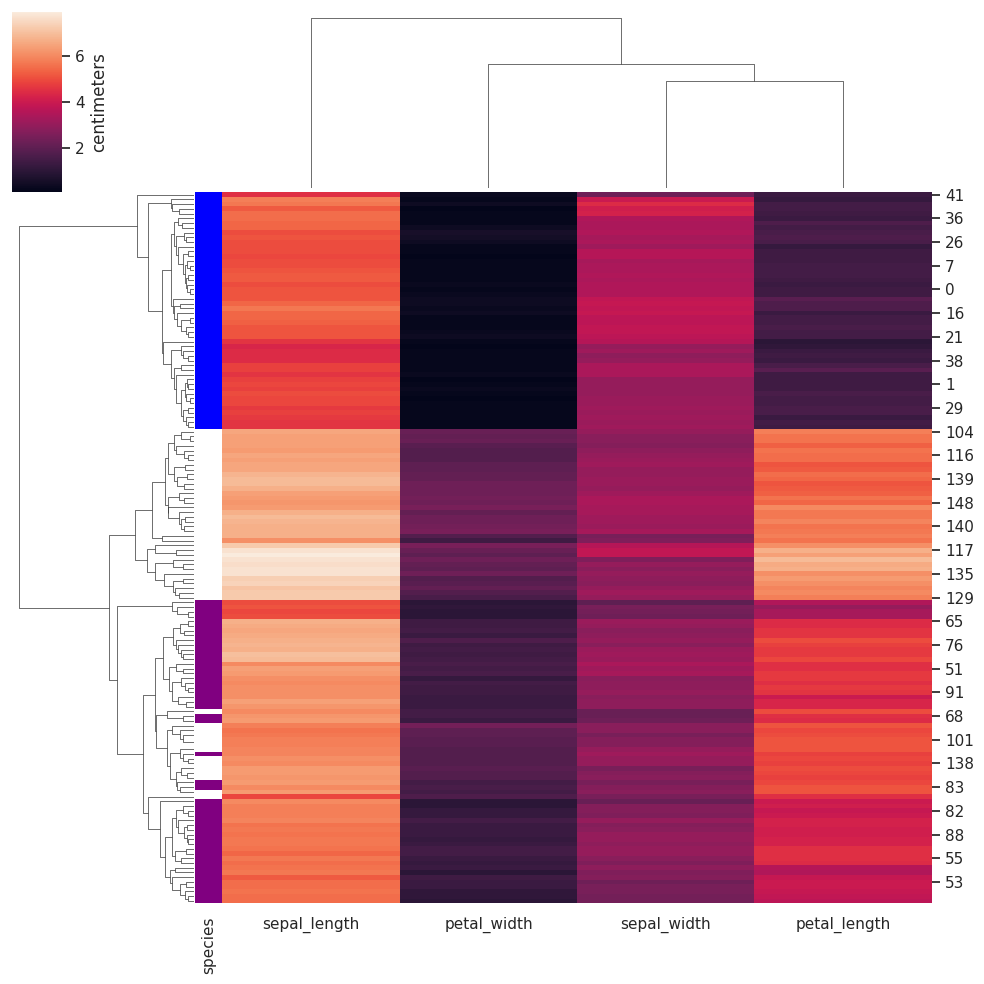

In [ ]:
sns.clustermap(iris, col_cluster = False, cbar_kws={'label': 'centimeters'}, row_colors=species_colors)